https://www.machinelearningnuggets.com/logistic-regression/


In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [154]:
#/* ########################### Read in the data ########################## */
df = pd.read_csv(
    "./data/TT-2018-H1-REDACTED-excluding-Postcodes.csv",
    delimiter=",",
    encoding_errors="replace",
)
df.dataframeName = "2018"

#/* ########################### Clean up the data ########################## */
# Rename columns
df = df.rename(columns={
  "ISF": "age", 
  "ISI": "householdSize",
  "ISJ": "numChildrenInHousehold"
})

# Remove participants with empty age
df = df.dropna(subset=["age"])
df = df[df.age != " "]

# Make dummy columns
df['isRetired'] = np.where(df['SGC'] == "Not working (i.e. under 8hrs/wk) - retired", 1, 0)
df['isHomebound'] = np.where(df['SGF'] == "Not working (i.e. under 8hrs/wk) - housewife/ disabled/ other", 1, 0)
df['isFemale'] = np.where(df['SE'] == "Female", 1, 0)
df['isRural'] = np.where(df['URBAN'] == "Rural", 1, 0)

df['nationalityEnglish'] = np.where(df['QZ10'] == "English", 1, 0)
df['nationalityScottish'] = np.where(df['QZ10'] == "Scottish", 1, 0)
df['nationalityWelsh'] = np.where(df['QZ10'] == "Welsh", 1, 0)
df['nationalityNorthIrish'] = np.where(df['QZ10'] == "Northern Irish", 1, 0)
df['nationalityBritish'] = np.where(df['QZ10'] == "British", 1, 0)
df['nationalityIrish'] = np.where(df['QZ10'] == "Irish", 1, 0)
df['nationalityOther'] = np.where(df['QZ10'] == "Other", 1, 0)
nationalities = ["nationalityEnglish", "nationalityScottish", "nationalityWelsh", "nationalityNorthIrish", "nationalityBritish", "nationalityIrish", "nationalityOther"]

df['raceWhite'] = np.where(df['QZ2XG'] == "TOTAL WHITE", 1, 0)
df['raceMixedWhiteBlackCaribbean'] = np.where(df['QZ2XH'] != "Not", 0, 1)
df['raceMixedWhiteBlackAfrican'] = np.where(df['QZ2XI'] != "Not", 0, 1)
df['raceMixedWhiteAsian'] = np.where(df['QZ2XJ'] != "Not", 0, 1)
df['raceMixedOther'] = np.where(df['QZ2XK'] != "Not", 0, 1)
df['raceIndian'] = np.where(df['QZ2XM'] != "Not", 0, 1)
df['racePakistani'] = np.where(df['QZ2XN'] != "Not", 0, 1)
df['raceBangladeshi'] = np.where(df['QZ2XO'] != "Not", 0, 1)
df['raceAsianOther'] = np.where(df['QZ2XP'] != "Not", 0, 1)
df['raceBlackCaribbean'] = np.where(df['QZ2XR'] != "Not", 0, 1)
df['raceBlackAfrican'] = np.where(df['QZ2XS'] != "Not", 0, 1)
df['raceBlackOther'] = np.where(df['QZ2XT'] != "Not", 0, 1)
df['raceMiddleEastern'] = np.where(df['QZ2XV'] != "Not", 0, 1)
df['raceChinese'] = np.where(df['QZ2XY'] != "Not", 0, 1)
df['raceOther'] = np.where(df['QZ2XZ'] != "Not", 0, 1)
df['raceRefused'] = np.where(df['QZ2XAB'] != "Not", 0, 1)
races = []

df['abilityBreathless'] = np.where(df['QZ5AA'] != "Not", 0, 1)
df['abilityVision'] = np.where(df['QZ5AB'] != "Not", 0, 1)
df['abilityCommunicating'] = np.where(df['QZ5AC'] != "Not", 0, 1)
df['abilityHearing'] = np.where(df['QZ5AD'] != "Not", 0, 1)
df['abilityWalking'] = np.where(df['QZ5AF'] != "Not", 0, 1)
df['abilityWheelchair'] = np.where(df['QZ5AE'] != "Not", 0, 1)
df['abilityReach'] = np.where(df['QZ5AG'] != "Not", 0, 1)
df['abilityMentalHealth'] = np.where(df['QZ5AH'] != "Not", 0, 1)
df['abilityDyslexia'] = np.where(df['QZ5AI'] != "Not", 0, 1)
df['abilityOther'] = np.where(df['QZ5AJ'] != "Not", 0, 1)
abilities = ["abilityBreathless", "abilityVision", "abilityCommunicating", "abilityHearing", "abilityWalking", "abilityWheelchair", "abilityReach", "abilityMentalHealth", "abilityDyslexia", "abilityOther"]

incomeSwitch = {
  "Up to �199 per week/ �10,399 per year": 1,
  "From �200 to �299 per week/ �10,400 to �15,599 per year": 2,
  "From �300 to �499 per week/ �15,600 to �25,599 per year": 3,
  "From �500 to �699 per week/ �26,000 to �36,399 per year": 4,
  "From �700 to �999 per week/ �36,400 to �51,999 per year": 5,
  "�1,000 per week and above/ �52,000 and above per year": 6,
  "Don't know/ Refused": 3.5
}

incomeCol = []
for i, val in enumerate(df['QZ13']):
  incomeCol.append(incomeSwitch[val])
df["income"] = incomeCol


classCol = []
for i, row in df.iterrows():
  if row['BKSEGA'] != "Not":
    classCol.append(1)
  elif row['BKSEGB'] != "Not":
    classCol.append(2)
  elif row['BKSEGC'] != "Not":
    classCol.append(3)
  elif row['BKSEGD'] != "Not":
    classCol.append(4)
  else:
    classCol.append(2.5)
df["class"] = classCol


df['accessHomeInternet'] = np.where(df['QE2'] != "No do not have access at home", 1, 0)
df['accessLandline'] = np.where(df['QCHECKA'] != "Landline phone", 1, 0)
df['accessMobile'] = np.where(df['QCHECKB'] != "Mobile phone", 1, 0)
df['accessBroadbandFixed'] = np.where(df['QCHECKC'] != "Fixed broadband internet access", 1, 0)
df['accessBroadbandMobile'] = np.where(df['QCHECKD'] != "Mobile broadband internet access", 1, 0)
df['accessNarrowband'] = np.where(df['QCHECKE'] != "Narrowband internet access", 1, 0)
df['accessTVPaid'] = np.where(df['QCHECKF'] != "TV service with additional channels you pay to receive", 1, 0)
access = ["accessHomeInternet", "accessLandline", "accessMobile", "accessBroadbandFixed", "accessBroadbandMobile", "accessNarrowband", "accessTVPaid"]


df['usesDVDPlayer'] = np.where(df['QB2K'] == "Not", 0, 1)
df['usesIpod'] = np.where(df['QB2C'] == "Not", 0, 1)
df['usesEbook'] = np.where(df['QB2D'] == "Not", 0, 1)

df['usesGamesTV'] = np.where(df['QB2A'] == "Not", 0, 1)
df['usesGamesHandheld'] = np.where(df['QB2B'] == "Not", 0, 1)
df['usesGamesVR'] = np.where(df['QB2J'] == "Not", 0, 1)

df['usesSmartWatch'] = np.where(df['QB2H'] == "Not", 0, 1)
df['usesSmartSpeaker'] = np.where(df['QB2I'] == "Not", 0, 1)

# df['usesMobile'] = np.where(df['QD2'] == "No mobiles in household", 0, 1)
df['usesSmartphone'] = np.where(df['QD24B'] == "Yes", 1, 0)

df['usesRadio'] = np.where(df['QP5G'] == "ANY 'ACTIVE' RADIO SETS IN THE HOME", 1, 0)
df['usesRadioDigital'] = np.where(df['QP7H'] == "ANY 'ACTIVE' DIGITAL RADIOS IN THE HOME", 1, 0)

df['usesHomeInternet'] = np.where(df['QE2'] == "Yes - have access and use at home", 1, 0)
df['usesTablet'] = np.where(df['QE36'] == "Yes", 1, 0)

usageOutputColumns = ["usesDVDPlayer", "usesGamesTV", "usesIpod", "usesEbook", "usesGamesHandheld", "usesSmartWatch", "usesSmartSpeaker", "usesGamesVR",  "usesSmartphone", "usesRadio", "usesRadioDigital", "usesHomeInternet", "usesTablet"]
# "usesMobile",

# Convert to proper data types
df["age"] = pd.to_numeric(df["age"])
df["numChildrenInHousehold"] = pd.to_numeric(df["numChildrenInHousehold"])

population of 3657, 833 seniors
(23%)


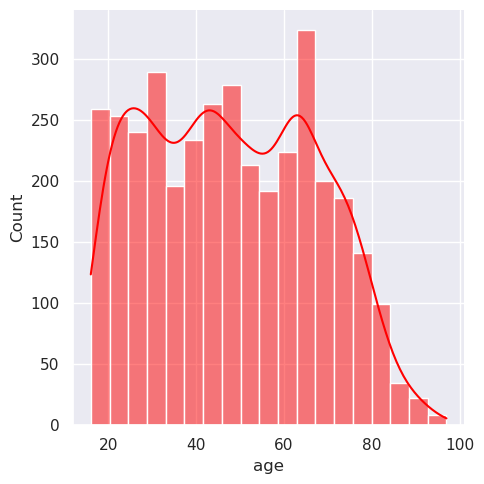

In [155]:
# Create dataframe of just seniors
seniorsDF = df.query("age >= 65")

nPopulation = df.shape[0]
nSeniors = seniorsDF.shape[0]

print(f'population of {nPopulation}, {nSeniors} seniors')
print(f'({100 * (nSeniors / nPopulation):.0f}%)')

# Distribution of age in the dataset
sns.displot(x='age', data=df, color='red', kde=True)

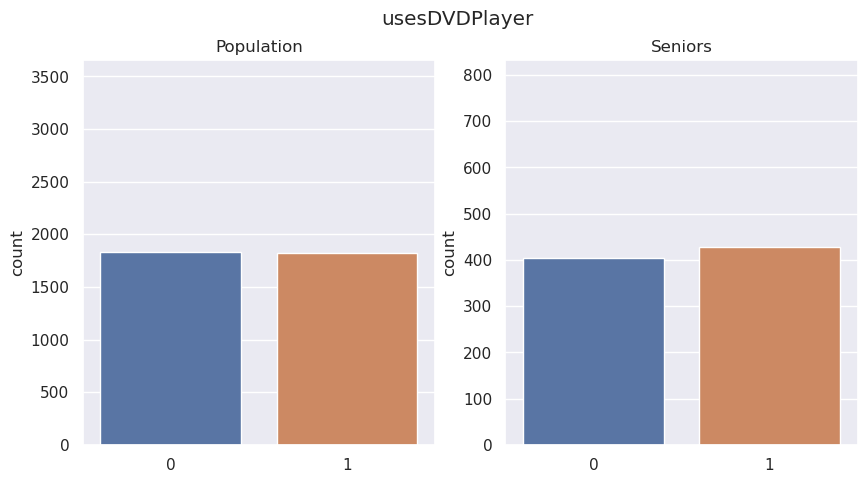

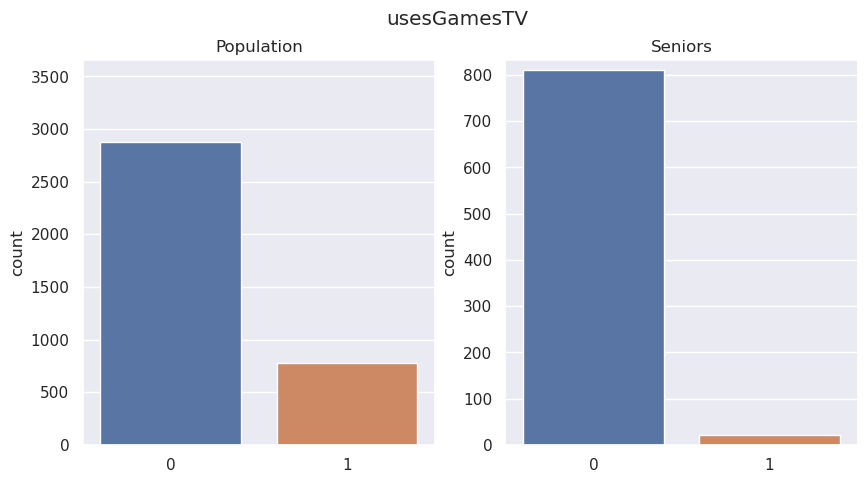

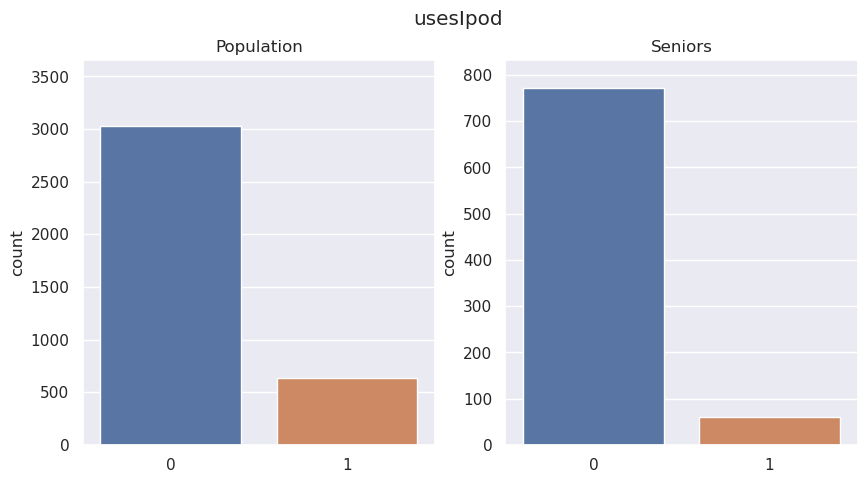

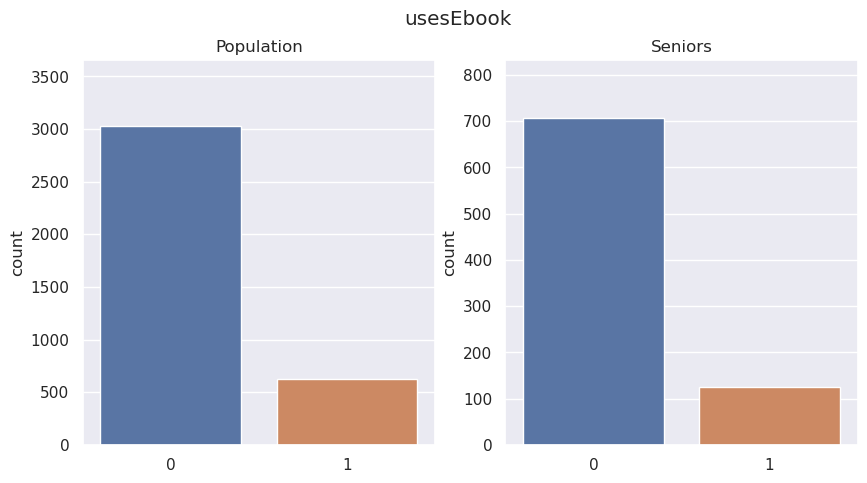

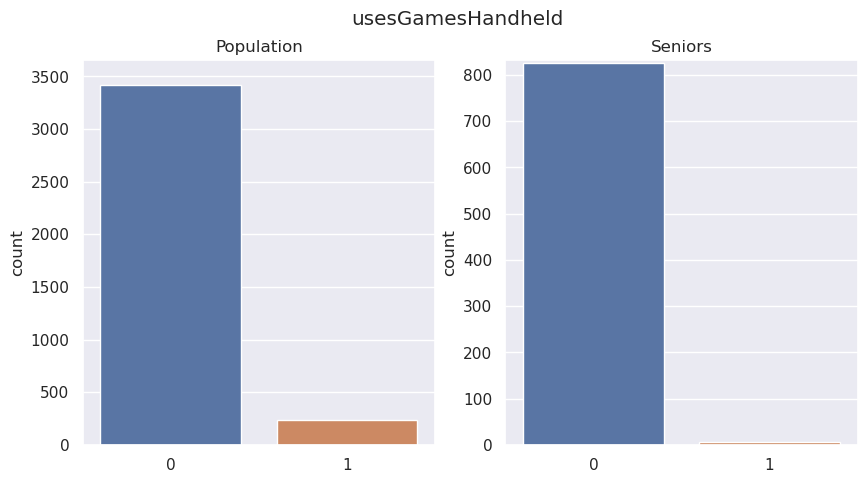

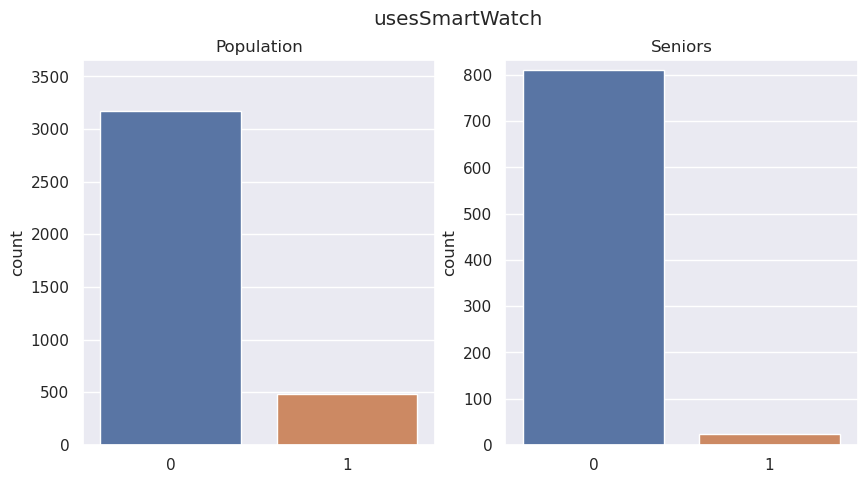

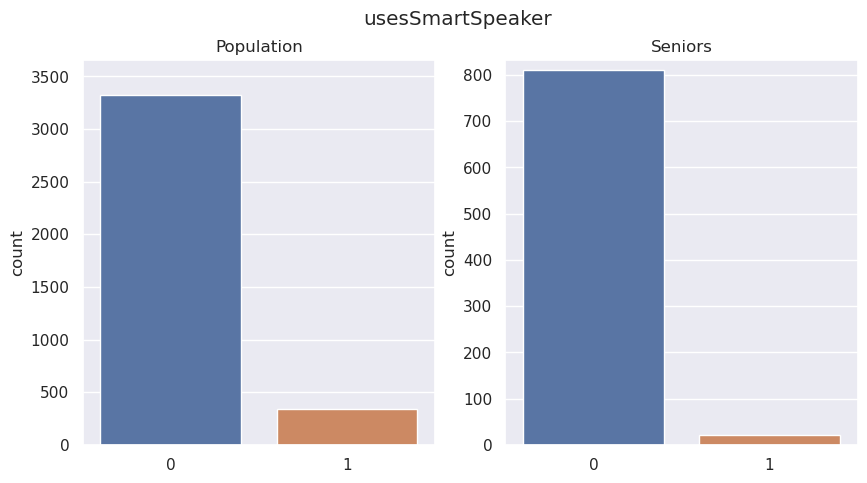

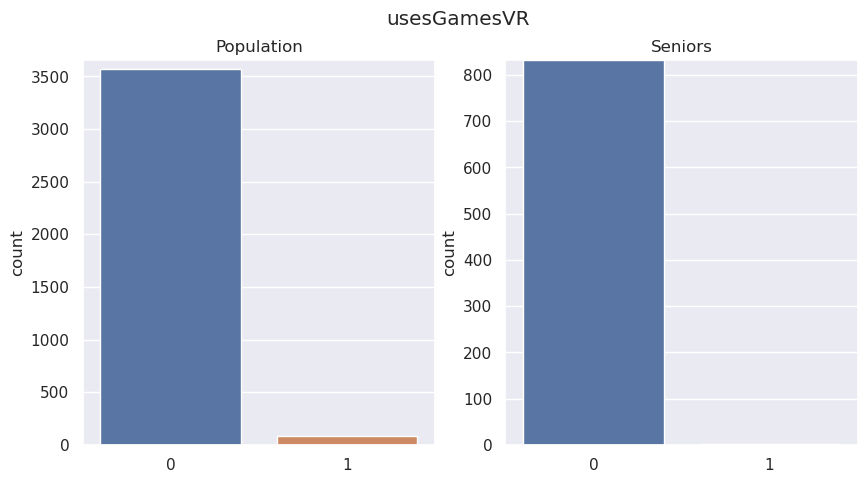

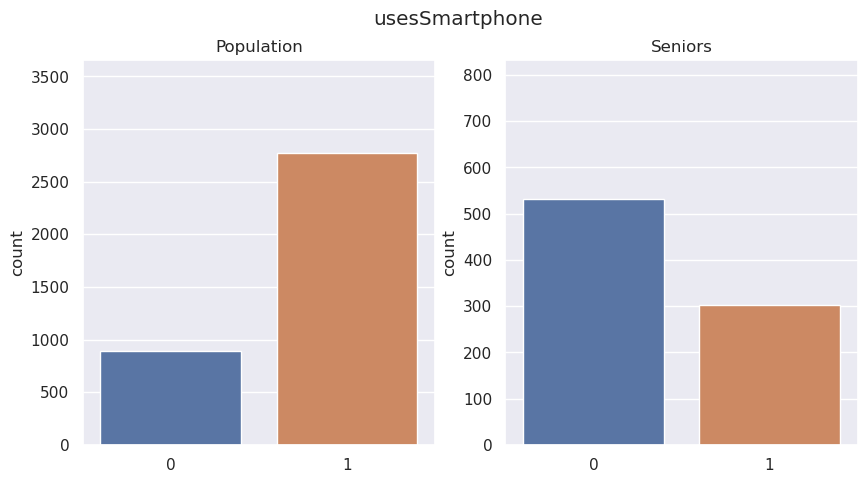

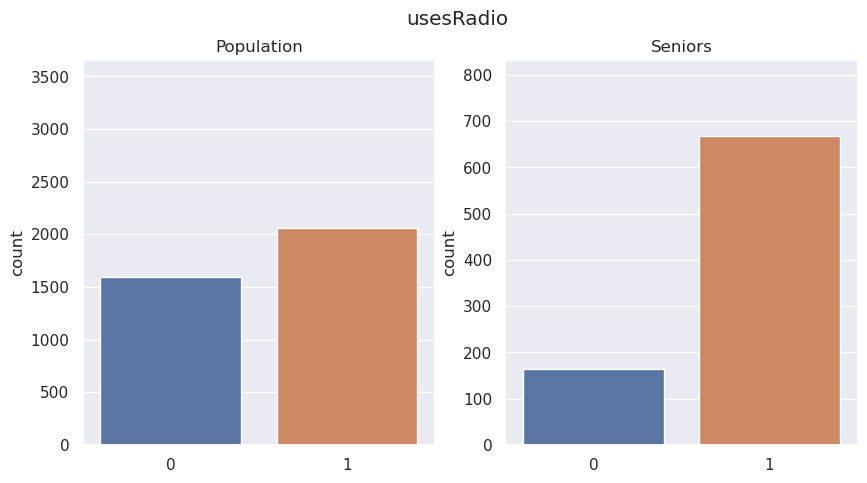

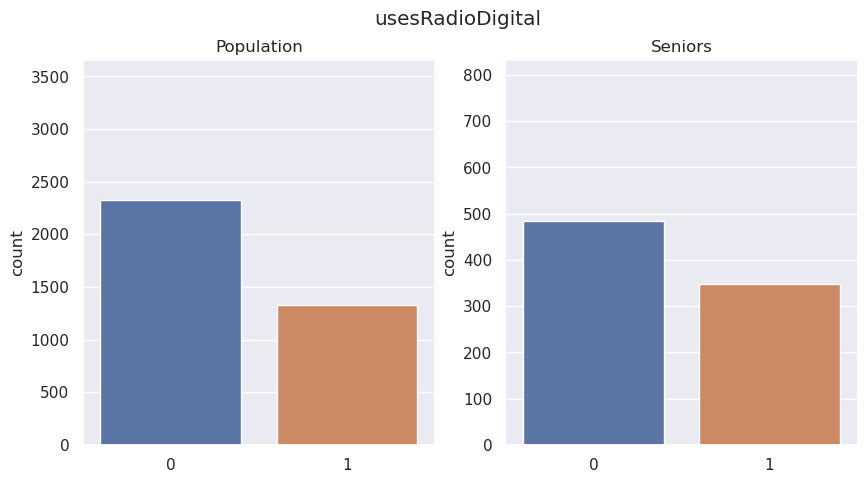

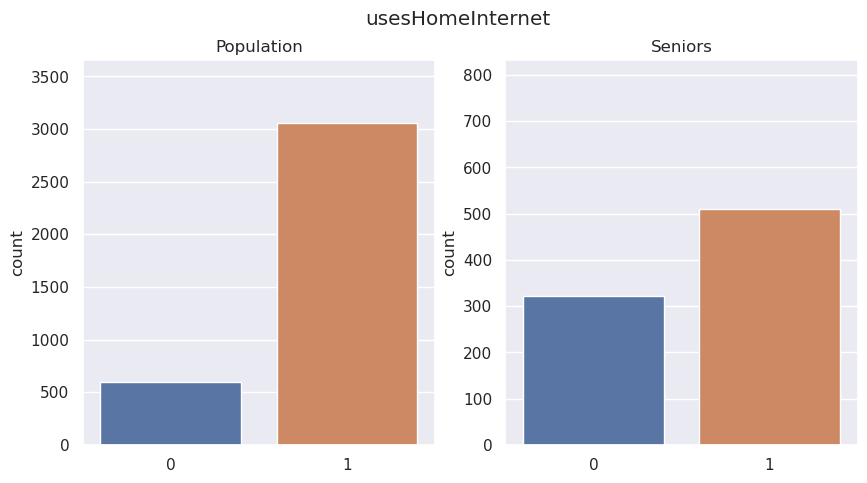

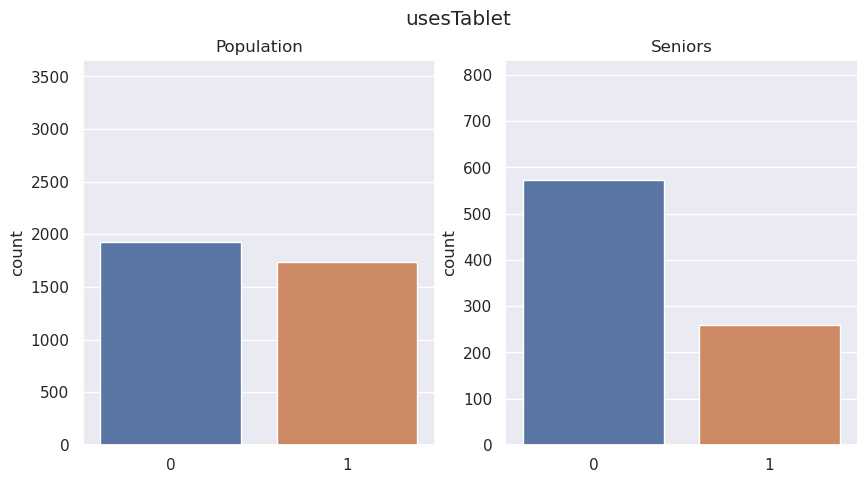

In [161]:
# Counts of usage for each output variable (population and seniors side-by-side)

# define figure size
sns.set(rc={"figure.figsize":(10, 5), "figure.max_open_warning": False})

for col in usageOutputColumns:
  fig, axes = plt.subplots(1, 2)
  fig.suptitle(col)

  plotPopulation = sns.countplot(x=col, data=df, ax=axes[0])
  plotPopulation.set_title("Population")
  plotPopulation.set_xlabel("")
  plotPopulation.set_ylabel("count")
  # Set y axis to range from 0 to all, so scaling is comparable
  plotPopulation.set_ylim(0, nPopulation)

  plotSeniors = sns.countplot(x=col, data=seniorsDF, ax=axes[1])
  plotSeniors.set_title("Seniors")
  plotSeniors.set_xlabel("")
  plotSeniors.set_ylabel("count")
  plotSeniors.set_ylim(0, nSeniors)

In [157]:
# Select independent variables
indCols = ["age", "isRetired", "isHomebound", "numChildrenInHousehold", "householdSize", "isFemale", "isRural", *nationalities, *abilities, *access, "income", "class"]
X = df.loc[:, indCols]

In [181]:
# Perform permutation test -- does the senior usage match the population usage for each output column?
from scipy.stats import permutation_test

# This is our statistic of interest -- difference between the two samples
def statistic(sample1, sample2):
  return sample1.sum() - sample2.sum()

# Print raw percentage of people who do
for col in usageOutputColumns:
  print(col)

  # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.permutation_test.html
  print(permutation_test((df[col], seniorsDF[col]), statistic, permutation_type='independent', alternative='two-sided').pvalue)
  
  print("-----------------------------------------------")

usesDVDPlayer
0.4534
-----------------------------------------------
usesGamesTV
0.0002
-----------------------------------------------
usesIpod
0.0002
-----------------------------------------------
usesEbook
0.1568
-----------------------------------------------
usesGamesHandheld
0.0002
-----------------------------------------------
usesSmartWatch
0.0002
-----------------------------------------------
usesSmartSpeaker
0.0002
-----------------------------------------------
usesGamesVR
0.0002
-----------------------------------------------
usesSmartphone
0.0002
-----------------------------------------------
usesRadio
0.0002
-----------------------------------------------
usesRadioDigital
0.0044
-----------------------------------------------
usesHomeInternet
0.0002
-----------------------------------------------
usesTablet
0.0002
-----------------------------------------------


<AxesSubplot:>

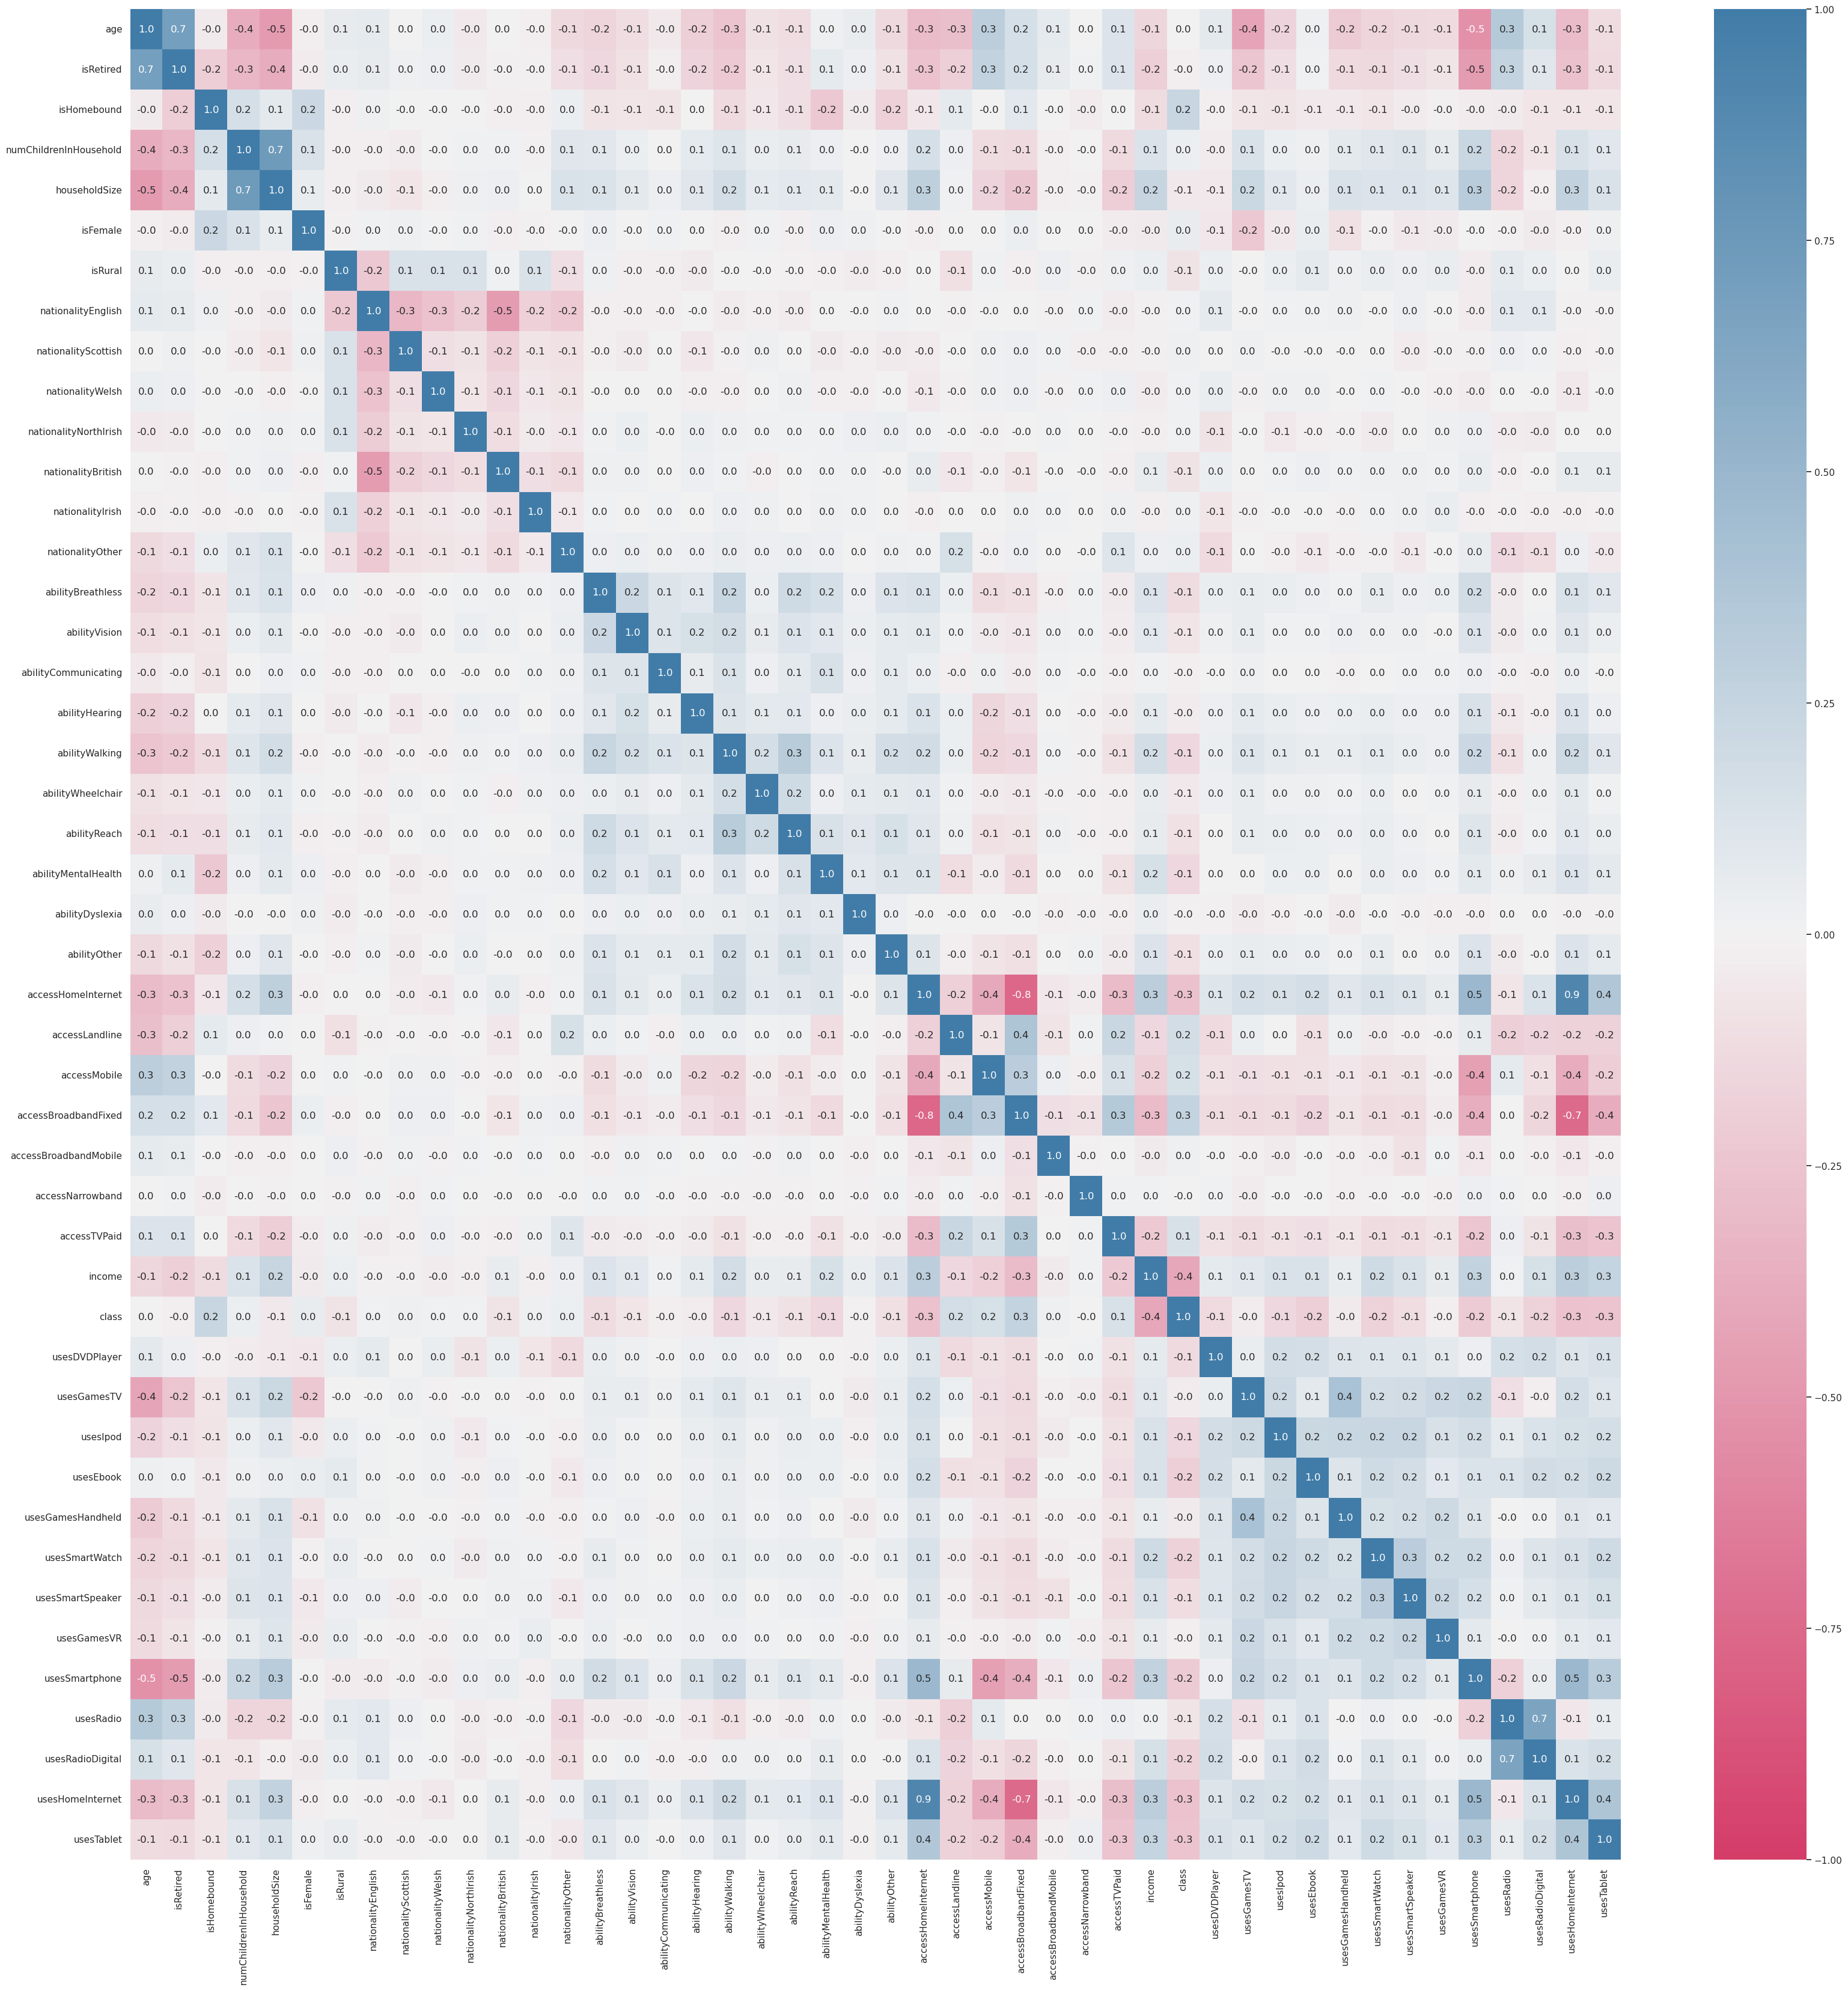

In [159]:
# calculate the correlation matrix
corr = df.corr(numeric_only=True).loc[[*indCols, *usageOutputColumns], [*indCols, *usageOutputColumns]]

# define figure size
sns.set(rc={"figure.figsize":(40, 40)})

# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, fmt='.1f', vmin=-1, vmax=1, cmap=(sns.diverging_palette(0,240, as_cmap=True)))

In [182]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# df or seniorsDF
df_to_test = df

# Train on everyone
# check training accuracy and testing accuracy
# if I train model and can't get past 50% on some classes -- no point in using the model
# focus on the ones I can successfully predict
# look at AUROC (and AUPRC for imbalanced class) -- can calculate for a random model
# baseline: shuffle the labels and see how they predict the unshuffled labels (baseline random)
# compare model to baseline -- order of magnitude better
# do all of this and THEN subset to old people
# I will have predictions for old people if looking at everyone
# want to get the thetas for each variable
# super worth doing exploratory data analysis -- for every variable, is there a clear correlation
# tells u what ur model should learn
# if the correlations are low model will be bad
# if they are high no reason model should be bad
# make a bar plot and name every feature and what the theta is (maybe absolute value)
# increase max iterations until you plateau
# step size: smaller is slower training, but too big would keep from (start 10^-5)
# have to optimize those two jointly




# Train a model for each output
for col in usageOutputColumns:
  # Get dependent variables
  y = df_to_test.loc[:, col]

  # Split into testing and training sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

  # Make the model
  classifier = LogisticRegression(solver="liblinear", max_iter=10000, class_weight="balanced", tol=0.00001)
  classifier.fit(X_train, y_train)

  # Do the prediction
  y_pred = classifier.predict(X_test)

  # Evaluate the model, using a confusion matrix heatmap
  # cf_matrix = confusion_matrix(y_test, y_pred)
  # plt.figure() # this creates a new figure on which your plot will appear
  # sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  # plt.title(f'Confusion matrix for {col}', y=1.1)
  # plt.ylabel('Actual label')
  # plt.xlabel('Predicted label')
  # plt.show()

  accuracyScore = accuracy_score(y_test,y_pred) * 100
  print(f'Testing accuracy of model for {col}: {accuracyScore}%')

  # Area Under the Receiver Operating Characteristic Curve (ROC AUC)
  print(f'Testing ROC AUC for {col}: {roc_auc_score(y_test, y_pred)}%')


  baseRatePos = 100 * df_to_test[col].sum() / df_to_test.shape[0]
  baseRateNeg = 100 * (df_to_test.shape[0] - df_to_test[col].sum()) / df_to_test.shape[0]
  posDiff = accuracyScore - baseRatePos
  negDiff = accuracyScore - baseRateNeg
  
  if posDiff < negDiff:
    baseRate = baseRatePos
    improvement = posDiff
  else:
    baseRate = baseRateNeg
    improvement = negDiff

  print(f"base rate: {baseRate}")
  print(f"improvement: {improvement}")

  # coef = classifier.coef_[0]
  # print(indCols)
  # print(coef)

  # Prints all the features seen
  # print(classifier.feature_names_in_)

  print("---------------------------------------------------------------------------")

  # sr_X = seniorsDF.loc[:, indCols]
  # sr_y = seniorsDF.loc[:, col]

  #  # Split seniors into testing and training sets
  # sr_X_train, sr_X_test, sr_y_train, sr_y_test = train_test_split(sr_X, sr_y, test_size=0.30)
  # # Do the prediction
  # sr_y_pred = classifier.predict(sr_X_test)
  # sr_result = pd.DataFrame({'Actual' : sr_y_test, 'Predicted' : sr_y_pred})

  # # Evaluate the model
  # sr_accuracyScore = accuracy_score(sr_y_test,sr_y_pred) * 100
  # print(f'Accuracy of model for {col} (seniors): {sr_accuracyScore}%')

  # if sr_accuracyScore > accuracyScore:
  #   print("better for seniors")
  # else:
  #   print("better for whole pop")

  # baseRatePos = 100 * seniorsDF[col].sum() / seniorsDF.shape[0]
  # baseRateNeg = 100 * (seniorsDF.shape[0] - seniorsDF[col].sum()) / seniorsDF.shape[0]
  # posDiff = abs(accuracyScore - baseRatePos)
  # negDiff = abs(accuracyScore - baseRateNeg)
  
  # if posDiff < negDiff:
  #   sr_baseRate = baseRatePos
  #   improvement = posDiff
  # else:
  #   sr_baseRate = baseRateNeg
  #   improvement = negDiff

  # if sr_baseRate > baseRate:
  #   print("baseRate higher for seniors")
  # else:
  #   print("baseRate higher for population")

  # print("---------------------------------------------------------------------------")


Testing accuracy of model for usesDVDPlayer: 61.93078324225865%
Testing ROC AUC for usesDVDPlayer: 0.6205235073933474%
base rate: 50.17774131802023
improvement: 11.753041924238417
---------------------------------------------------------------------------
Testing accuracy of model for usesGamesTV: 75.77413479052824%
Testing ROC AUC for usesGamesTV: 0.7536846548509807%
base rate: 78.78042111019961
improvement: -3.006286319671375
---------------------------------------------------------------------------
Testing accuracy of model for usesIpod: 61.83970856102003%
Testing ROC AUC for usesIpod: 0.6489108166967017%
base rate: 82.71807492480175
improvement: -20.878366363781723
---------------------------------------------------------------------------
Testing accuracy of model for usesEbook: 59.107468123861565%
Testing ROC AUC for usesEbook: 0.6429544496845362%
base rate: 82.80010937927263
improvement: -23.69264125541106
------------------------------------------------------------------------